In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load data
df = pd.read_csv("../Dataset/normalized_data.csv")

# Separate features and target variable
X = df.drop('Potability', axis=1) 
y = df['Potability']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Model Random Forest
model = RandomForestClassifier(n_estimators= 1000)  # Sesuaikan n_estimators sesuai kebutuhan
model.fit(X_train, y_train)

# Melakukan prediksi pada set data uji
y_pred = model.predict(X_test)

In [21]:
predictionTest = model.predict(X_test)
predictionTrain = model.predict(X_train)

# Performance Metrics
accuracy = accuracy_score(predictionTest, y_pred) 
precision = precision_score(predictionTest, y_pred)
recall = recall_score(predictionTest, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [22]:
print(f'Training Score sebelum tuning model: {accuracy_score(predictionTrain, y_train) * 100:.2f}%') #predictionTrain(X_train) memprediksi y_train
print(f'Test Score sebelum tuning model: {accuracy_score(predictionTest, y_test) * 100:.2f}%') #predictionTest(X_test) memprediksi y_test

Training Score sebelum tuning model: 100.00%
Test Score sebelum tuning model: 67.45%


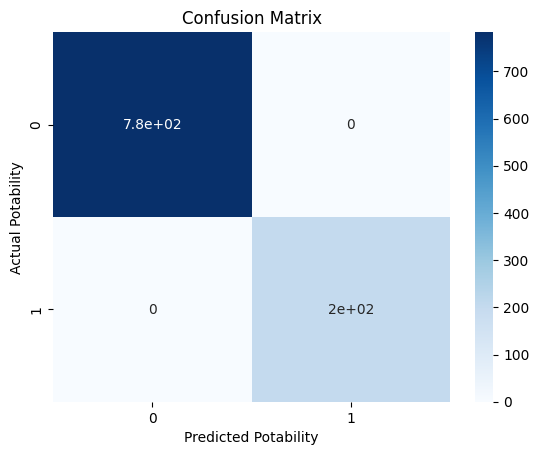

In [25]:
confusion_matrix = confusion_matrix(predictionTest, y_pred)

# Create a confusion matrix heatmap with labels using Seaborn
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Potability')
plt.ylabel('Actual Potability')
plt.title('Confusion Matrix')
plt.show()

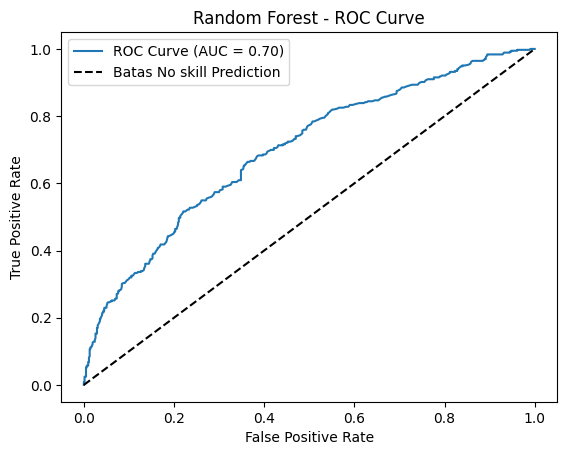

In [26]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--', label='Batas No skill Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()